In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('hr.csv')

# EDA

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

Dataframe have 1470 rows and 35 columns.

In [5]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no null values in the dataframe

In [6]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

There are 8 columns with object type data including the label column, rest all the columns have integer type values.

In [7]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

There are three columns with only one unique values. So they are not of any use to us. Employee number is also not of any use as it is an identifier column.

In [8]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

Dataset is imbalanced.

In [9]:
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

There is high skewness present in some of the columns that is needed to be handled.

In [10]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Every column has count equal to 1470 signifying no missing values. Mean is not equal to median stating that the data is not normally distributed. Most normally distributes column is Daily rate where mean is almost eqaul to median. Variance is quite low in many columns except for DailyRate which has high variance. Outliers are also present as the min, max, and interquartile ranges have large difference.

### Univariate Analysis

In [11]:
cat=[feature for feature in df.columns if df[feature].nunique()<=20 and df[feature].nunique()>1]
cont=[feature for feature in df.columns if df[feature].nunique()>20 and df[feature].nunique()<1470]

No     1233
Yes     237
Name: Attrition, dtype: int64

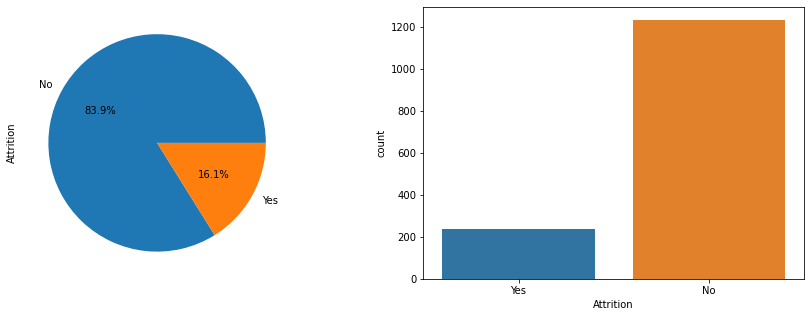

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['Attrition'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['Attrition'])
df['Attrition'].value_counts()

Dataset is highly imbalance as the label class has only 16.1% of yes and 83.9% of no category.

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

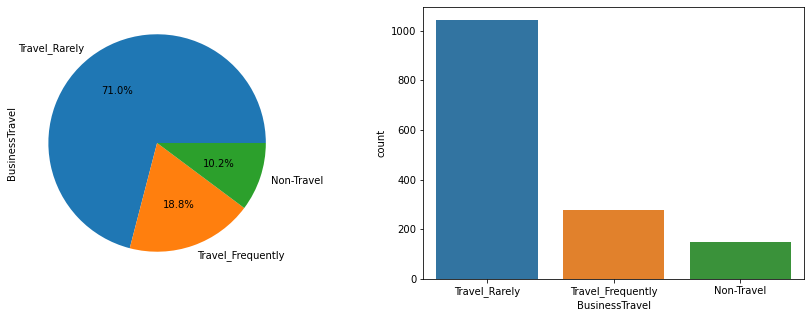

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['BusinessTravel'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['BusinessTravel'])
df['BusinessTravel'].value_counts()

Majority of the employees travel rarely while 10.2% of employees are non travellers.

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

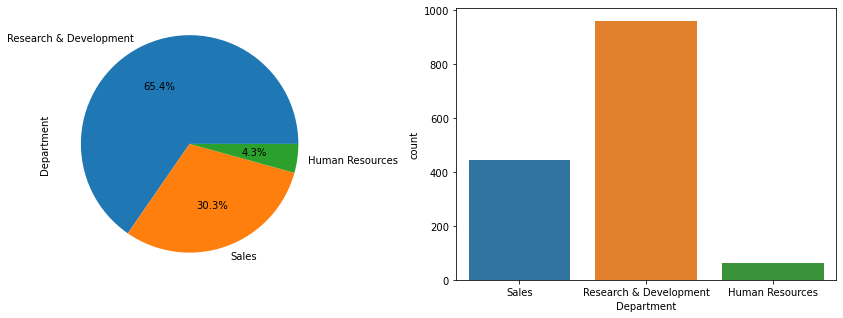

In [14]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['Department'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['Department'])
df['Department'].value_counts()

There are three departments in the company. Most of the employees work in Research & Development department while very few work in the HR department.

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

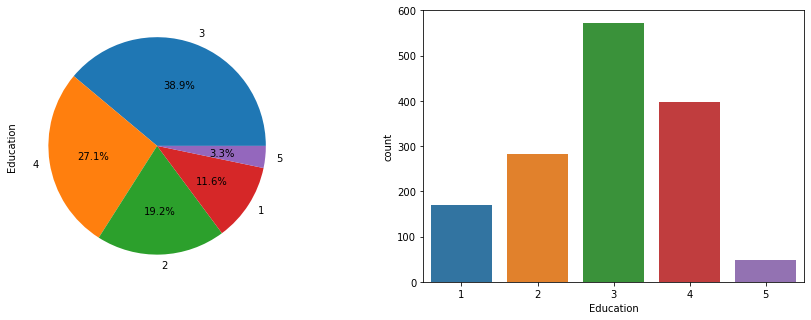

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['Education'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['Education'])
df['Education'].value_counts()

There are 5 categories of Education. Only 3.3% employee hold the highest education qualification. Most of the employees have the education category 3.

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

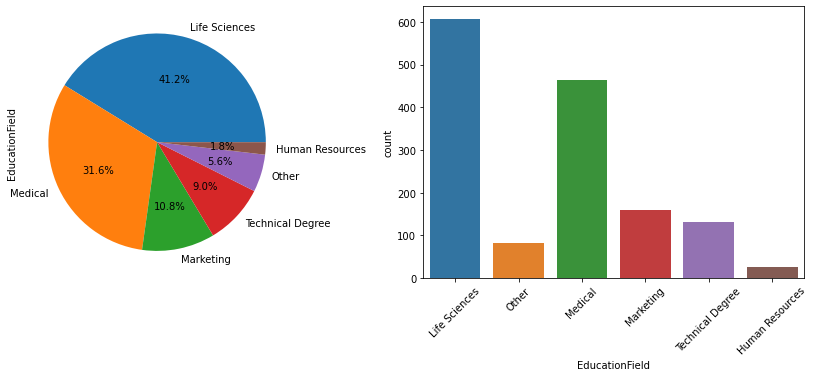

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['EducationField'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['EducationField'])
plt.xticks(rotation=45)
df['EducationField'].value_counts()

Majority of the employees have Life sciences as there field. There are a lot of employees belonging to medical field as well. Apart from all fields, there is an Other field which may contain employees from rare educational fields.

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

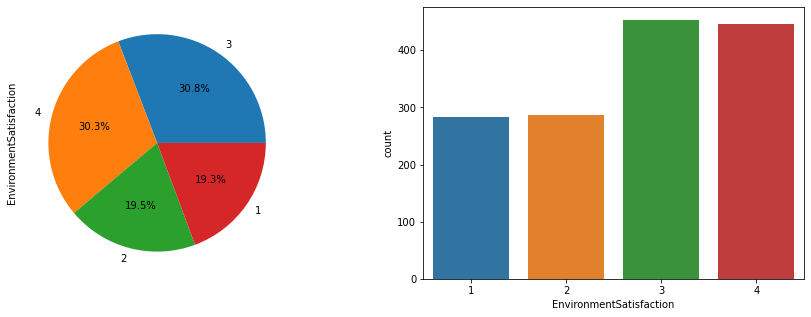

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['EnvironmentSatisfaction'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['EnvironmentSatisfaction'])
df['EnvironmentSatisfaction'].value_counts()

Most of the employees show high levels of environment satisfaction but around 284 employees show very low satisfaction which is quite a big number.

Male      882
Female    588
Name: Gender, dtype: int64

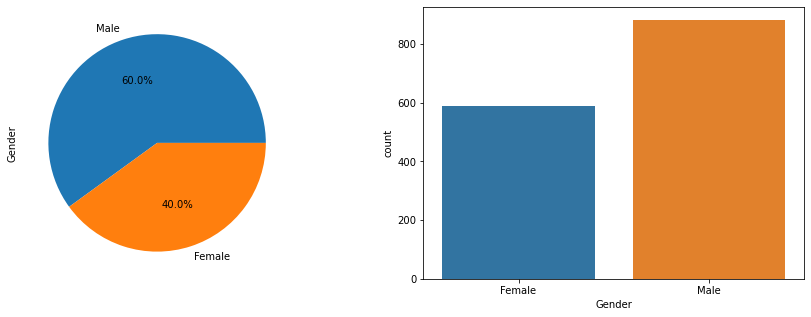

In [18]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['Gender'])
df['Gender'].value_counts()

Majority of the employees working are males. There is a 3:2 gender ratio.

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

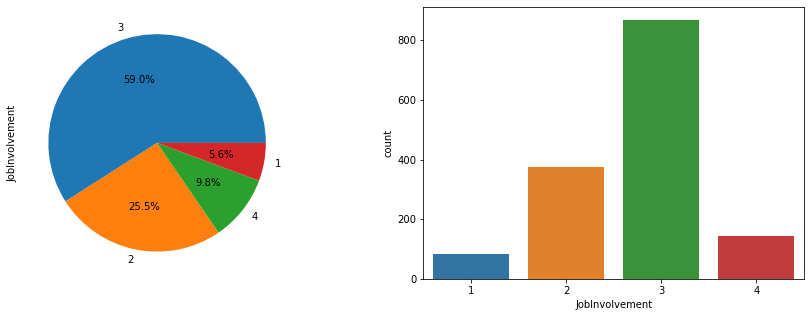

In [19]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['JobInvolvement'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['JobInvolvement'])
df['JobInvolvement'].value_counts()

Category 3 people show the highest involment in there job, while category 1 shows least involment, may be they are part time workers.

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

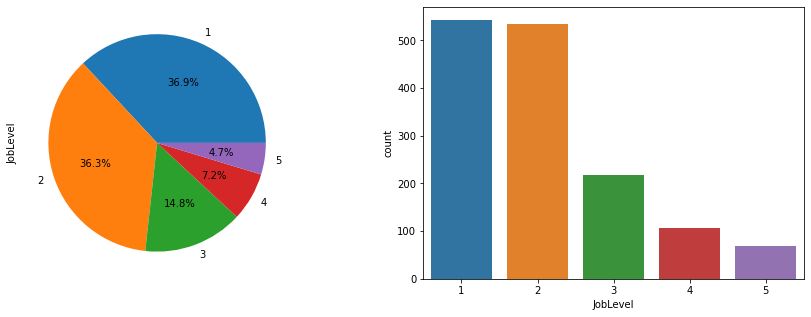

In [20]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['JobLevel'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['JobLevel'])
df['JobLevel'].value_counts()

There are 5 job levels. Oviously high positons have less number of employee, Majority of the employees work in lower levels.

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

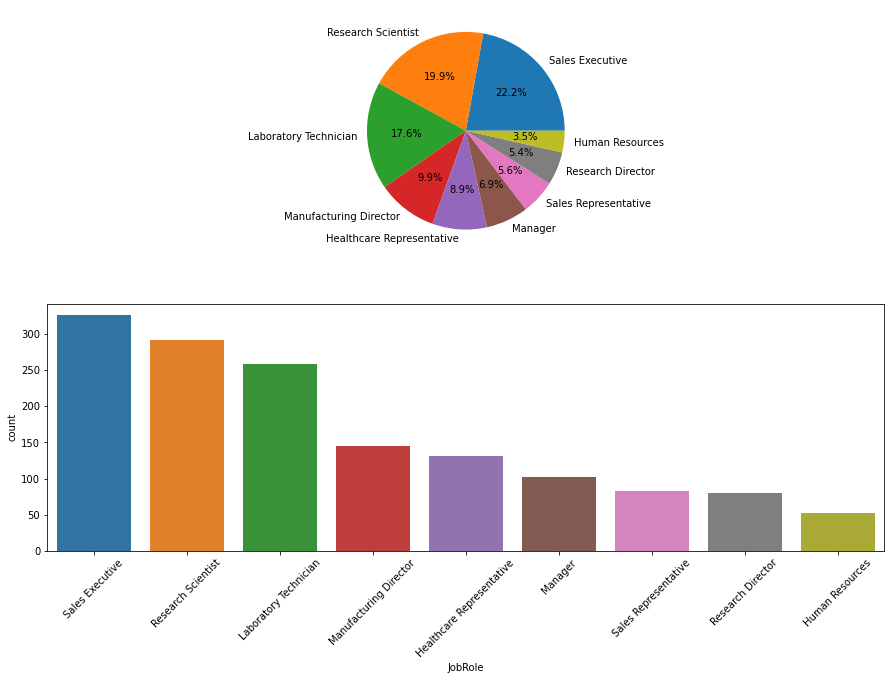

In [21]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
df['JobRole'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.subplot(2,1,2)
sns.countplot(df['JobRole'])
plt.xticks(rotation=45)
df['JobRole'].value_counts()

There are 9 job roles. Most of them are of Sales Executive, and only 3.5% are of Human Resources.

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

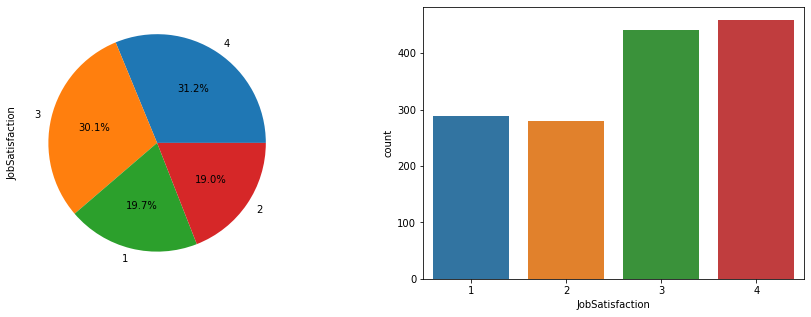

In [22]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['JobSatisfaction'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['JobSatisfaction'])
df['JobSatisfaction'].value_counts()

There are 4 levels of job satisfaction. Most of the employees are satified with there job but around 569 people show low to satisfactory opinion on there job satisfaction, which is a large number.

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

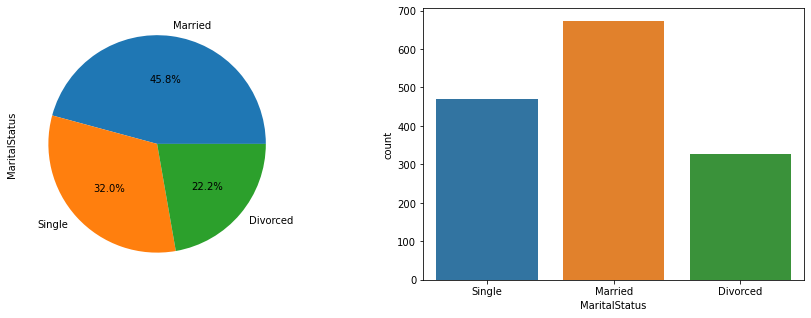

In [23]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['MaritalStatus'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['MaritalStatus'])
df['MaritalStatus'].value_counts()

Most of the employees are Married and a lot of them are divorced. Maritial status can also define the age category of an employee as young,middle age and old.

No     1054
Yes     416
Name: OverTime, dtype: int64

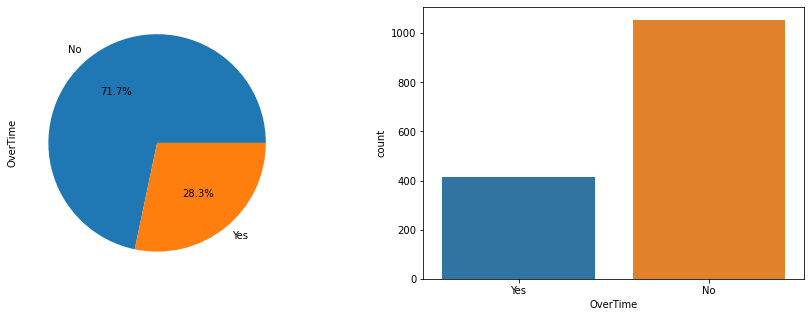

In [24]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['OverTime'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['OverTime'])
df['OverTime'].value_counts()

Only 28.3% people work overtime, maybe they are in need of money or few number of acquaintances

3    1244
4     226
Name: PerformanceRating, dtype: int64

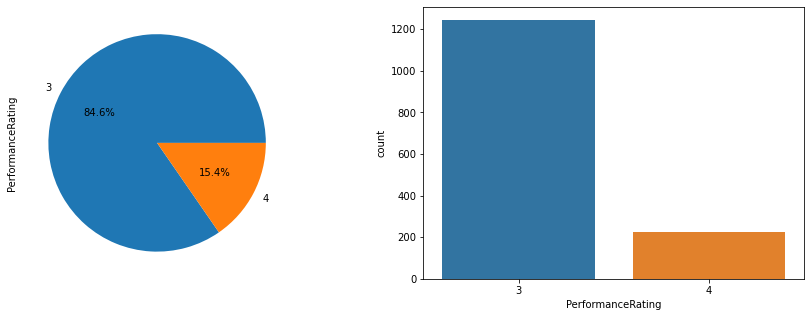

In [25]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['PerformanceRating'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['PerformanceRating'])
df['PerformanceRating'].value_counts()

There are only two categories 3 and 4, it could be that none of the employees have performance in level 1 or 2.

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64

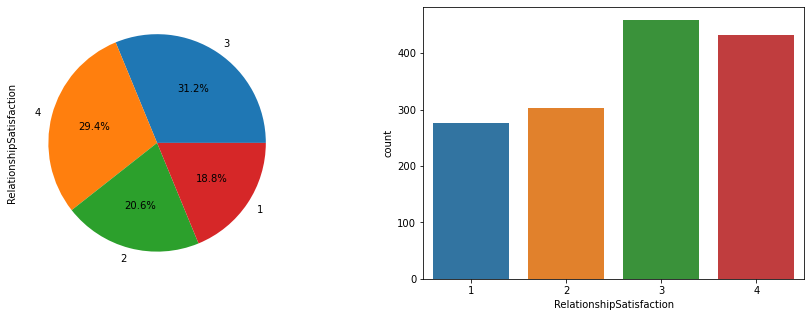

In [26]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['RelationshipSatisfaction'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['RelationshipSatisfaction'])
df['RelationshipSatisfaction'].value_counts()

Most of the people are satisfied with there relationship.

0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64

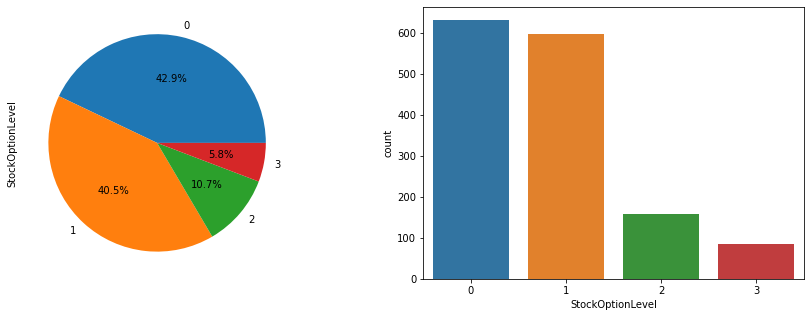

In [27]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['StockOptionLevel'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['StockOptionLevel'])
df['StockOptionLevel'].value_counts()

Most of the employees are holding very few stocks while the number of employees with highest stocks are very few.

2    547
3    491
4    123
5    119
1     71
6     65
0     54
Name: TrainingTimesLastYear, dtype: int64

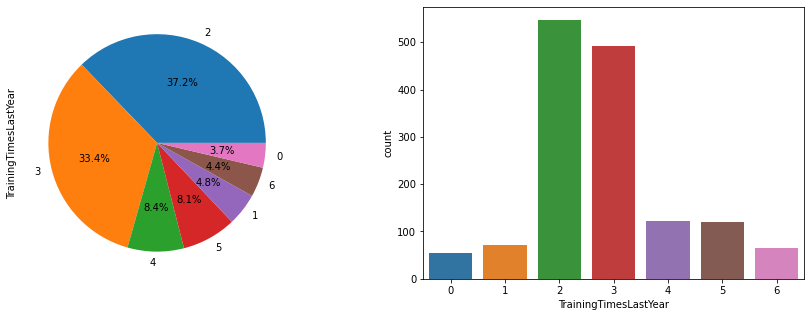

In [28]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['TrainingTimesLastYear'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['TrainingTimesLastYear'])
df['TrainingTimesLastYear'].value_counts()

Most of the employees train 2 to 3 times a year while no. of employees training rigorously or doing none of the training are very few in numbers.

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

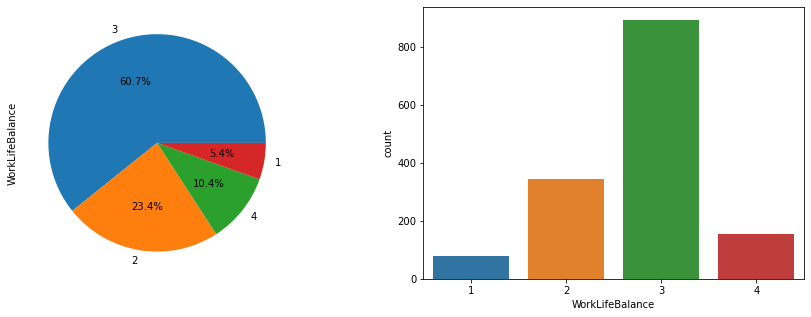

In [29]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['WorkLifeBalance'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['WorkLifeBalance'])
df['WorkLifeBalance'].value_counts()

Majority of the employees have there life balance at level 3, there are around 5.4% employees who need to work on this. Only 10.4% employees have there life completely balanced.

Maximum 60
Minimum 18


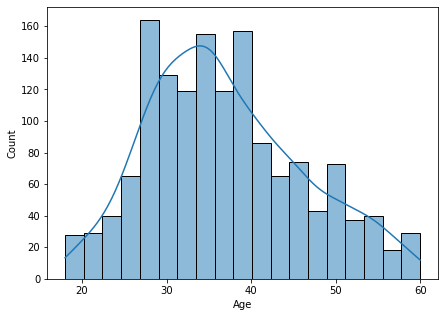

In [30]:
plt.figure(figsize=(7,5))
sns.histplot(df['Age'],kde=True)
print('Maximum',df['Age'].max())
print('Minimum',df['Age'].min())

There is low skewness, data is almost normally distributed. Majority of the employees working have there age in the range 28 to 40. Employees as young as 18 start working in the company and the retirement age seems to be 60.

Maximum 1499
Minimum 102


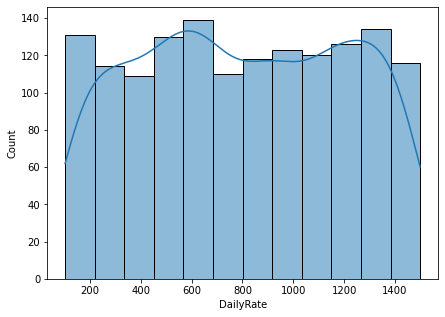

In [31]:
plt.figure(figsize=(7,5))
sns.histplot(df['DailyRate'],kde=True)
print('Maximum',df['DailyRate'].max())
print('Minimum',df['DailyRate'].min())

Distribution of employees is even for Daily Rate. There is low skewness, data is almost normally distributed. Daily rate of employees range from 102 to 1499.

Maximum 29
Minimum 1


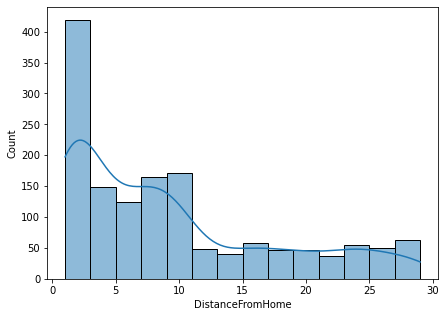

In [32]:
plt.figure(figsize=(7,5))
sns.histplot(df['DistanceFromHome'],kde=True)
print('Maximum',df['DistanceFromHome'].max())
print('Minimum',df['DistanceFromHome'].min())

Most of the employees live less than 3 kms from the office. There are around 100 employees who travel more than 25kms to reach office. Data is highly skewed to the right with mean greater than the median.

Maximum 100
Minimum 30


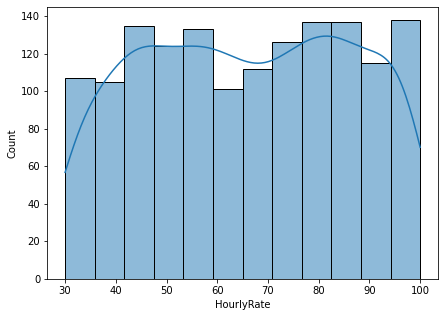

In [33]:
plt.figure(figsize=(7,5))
sns.histplot(df['HourlyRate'],kde=True)
print('Maximum',df['HourlyRate'].max())
print('Minimum',df['HourlyRate'].min())

Distribution of employees is even for hourly rate. Data foloows gaussian distribution. Hourly rate of employees ranges from 30 to 100.

Maximum 19999
Minimum 1009


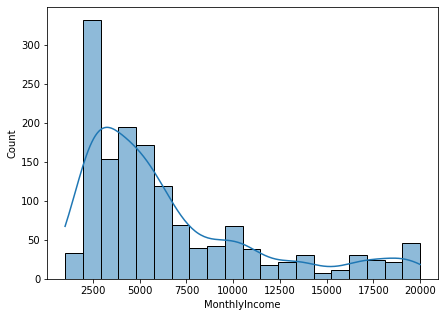

In [34]:
plt.figure(figsize=(7,5))
sns.histplot(df['MonthlyIncome'],kde=True)
print('Maximum',df['MonthlyIncome'].max())
print('Minimum',df['MonthlyIncome'].min())

Employees get income from 1009 to 19999. Majority of the employees get income around 2500. There are less than 50 employees getting income of the highest level. Data is right skewed with mean greater than the median.

Maximum 26999
Minimum 2094


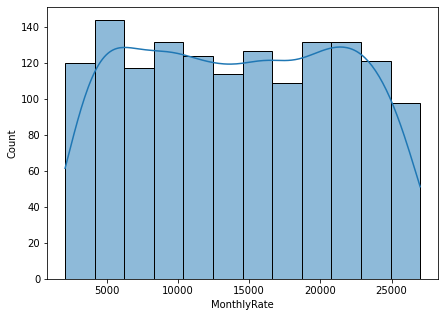

In [35]:
plt.figure(figsize=(7,5))
sns.histplot(df['MonthlyRate'],kde=True)
print('Maximum',df['MonthlyRate'].max())
print('Minimum',df['MonthlyRate'].min())

There is low skewness in the data. Monthly rate range from 2094 to 25999 with number of employees showing very less variance.

Maximum 25
Minimum 11


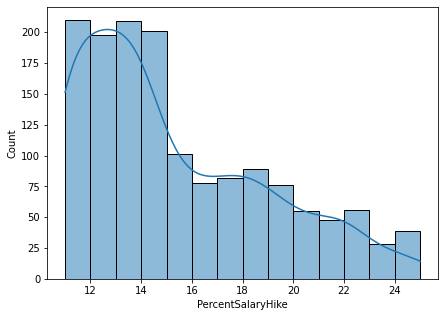

In [36]:
plt.figure(figsize=(7,5))
sns.histplot(df['PercentSalaryHike'],kde=True)
print('Maximum',df['PercentSalaryHike'].max())
print('Minimum',df['PercentSalaryHike'].min())

Most employees are given percent salary hike in the range of 11 to 15 percent while few are also given hike around 24 to 25 percent. Feature is kewed towards right having mean greater than median.

Maximum 40
Minimum 0


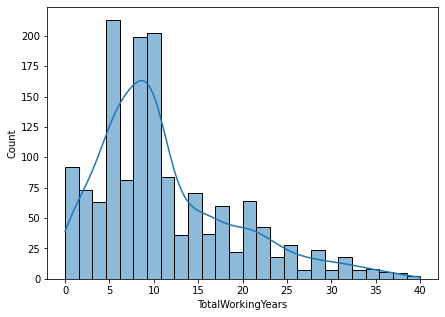

In [37]:
plt.figure(figsize=(7,5))
sns.histplot(df['TotalWorkingYears'],kde=True)
print('Maximum',df['TotalWorkingYears'].max())
print('Minimum',df['TotalWorkingYears'].min())

Employees are working in the company for more than 30 years but the majority of employees working in the company have total years of working in the range 5 to 11 years. Feature shows skeweness which needs to be handles.

Maximum 40
Minimum 0


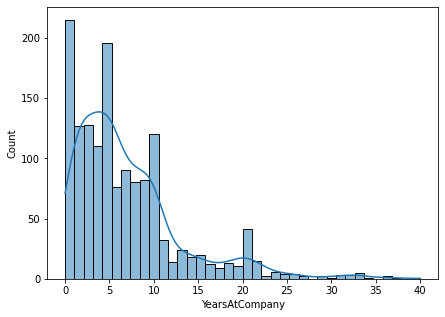

In [38]:
plt.figure(figsize=(7,5))
sns.histplot(df['YearsAtCompany'],kde=True)
print('Maximum',df['YearsAtCompany'].max())
print('Minimum',df['YearsAtCompany'].min())

There very few loyal employees who have been in the company for more than 30 years. Majority of the employees consist of new employees who have been in the company for only an year. Data is highly skewed. Skewness is towards right.

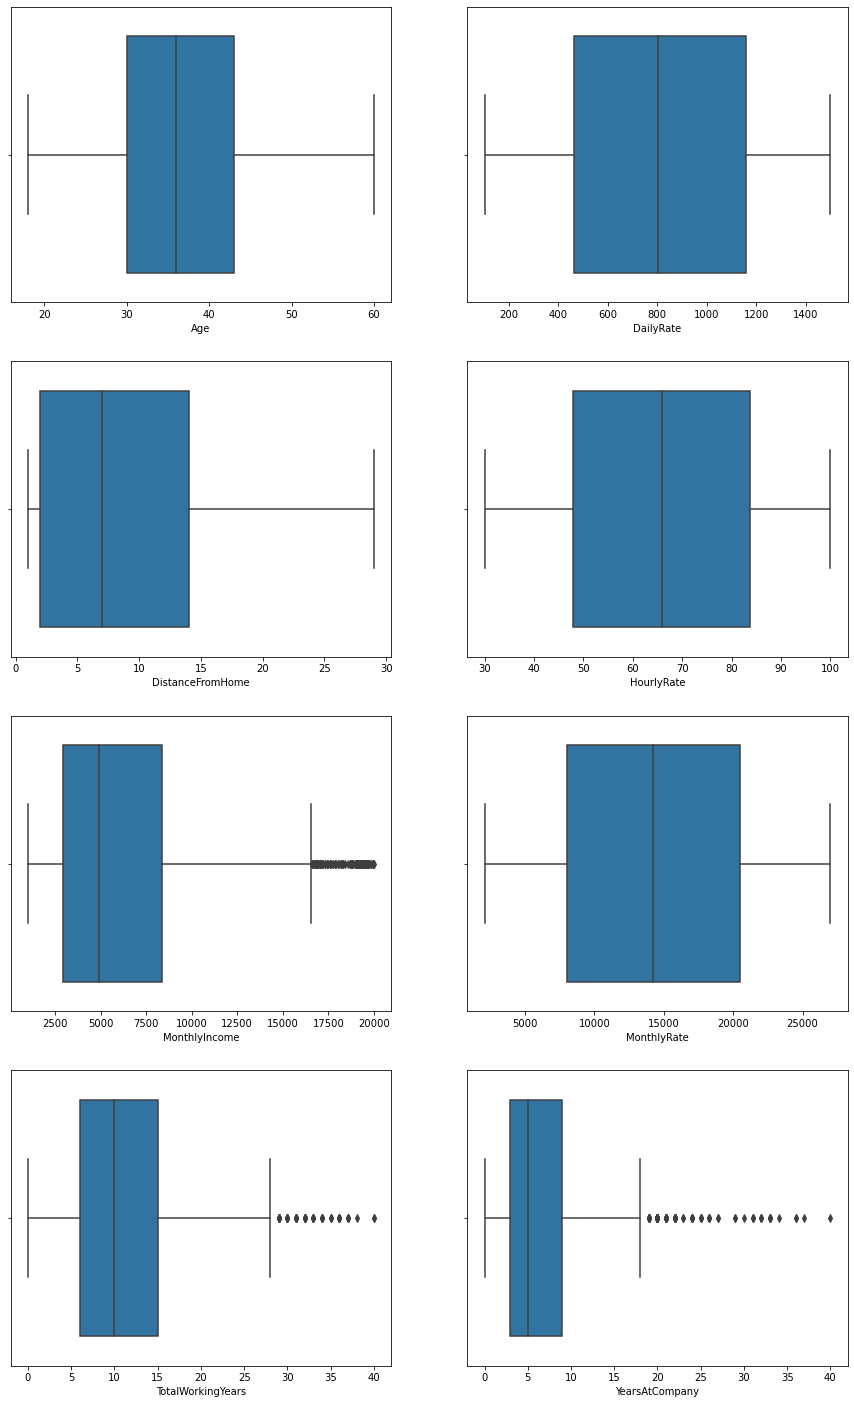

In [39]:
fig,ax=plt.subplots(4,2,figsize=(15,25))
r=0
c=0
for i,n in enumerate(cont):
    if i%2==0 and i>0:
        r+=1
        c=0
    sns.boxplot(df[n],ax=ax[r,c])
    c+=1

There are few outliers present in the continuous data, while a large number of outliers are present in the Monthly incom column.

### Bivariate Analysis

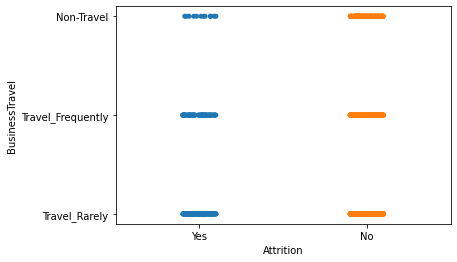

In [40]:
sns.stripplot(x='Attrition',y='BusinessTravel',data=df)

Employees who do not travel on bussinesses tend to attrit more.

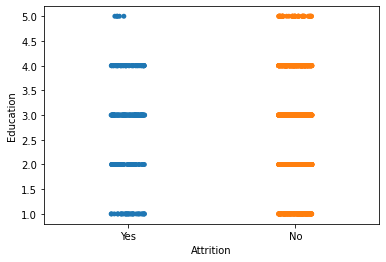

In [41]:
sns.stripplot(x='Attrition',y='Education',data=df)

People with highest level of education has shown more attrition than any other educational level.

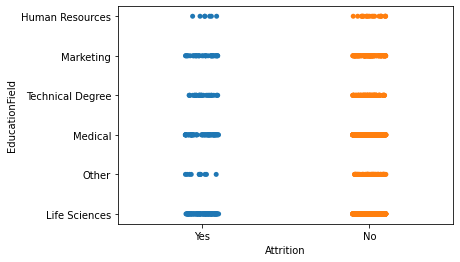

In [42]:
sns.stripplot(x='Attrition',y='EducationField',data=df)

Employs under Human resources and other education field tend to attrit more than employees belonging to any other educational field.

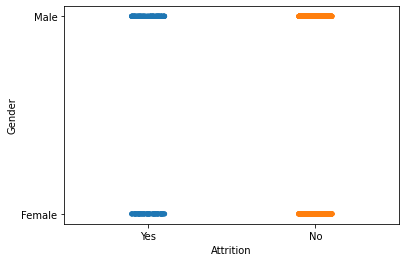

In [43]:
sns.stripplot(x='Attrition',y='Gender',data=df)

There is no dependency on gender for attrition.

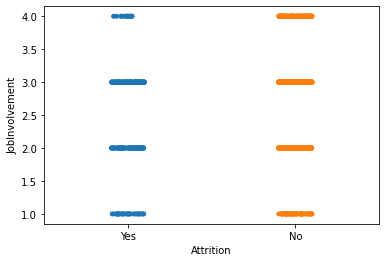

In [44]:
sns.stripplot(x='Attrition',y='JobInvolvement',data=df)

Employees who are involved too much in work or too less tend to attrit more than employees who lie between these ranges.

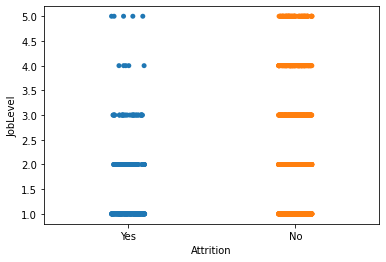

In [45]:
sns.stripplot(x='Attrition',y='JobLevel',data=df)

Employees at higher job levels tend to attrit more than who are at lower level.

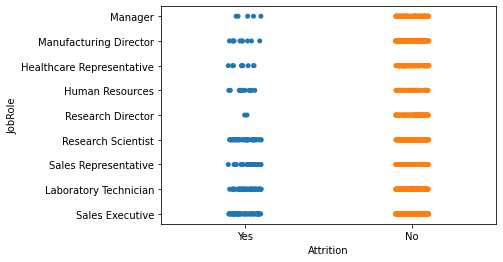

In [46]:
sns.stripplot(x='Attrition',y='JobRole',data=df)

Research Directors show the most attrition followed by Managers and human resources. While the Sales Executives show no attrition.

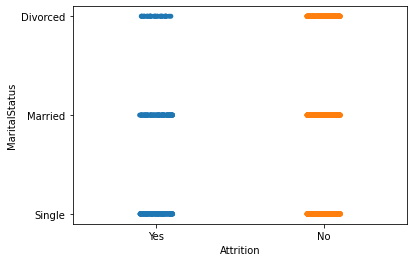

In [47]:
sns.stripplot(x='Attrition',y='MaritalStatus',data=df)

Divorced employees show more attrition than single or Married ones.

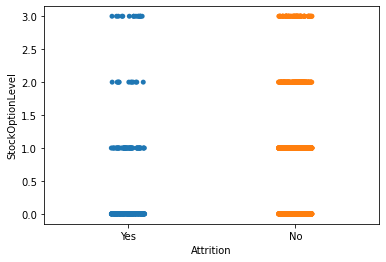

In [48]:
sns.stripplot(x='Attrition',y='StockOptionLevel',data=df)

Employees in higher levels of stock option show more attrition than eployees in the lower levels.

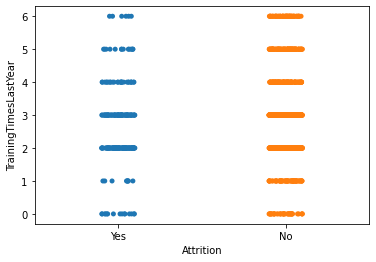

In [49]:
sns.stripplot(x='Attrition',y='TrainingTimesLastYear',data=df)

Employees who train extensively or very less both tend to attrit. While employees training 2 to 3 times a year show no attrition.

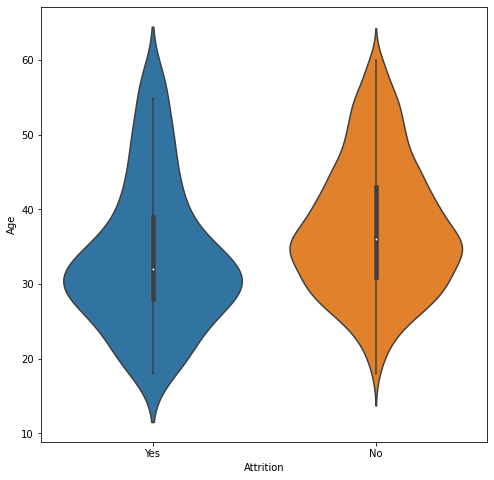

In [50]:
plt.figure(figsize=(8,8))
sns.violinplot(x='Attrition',y='Age',data=df)

Attrition is maximum in the range 27 to 33. As age increases attrition decreases as people look for stability in their job.

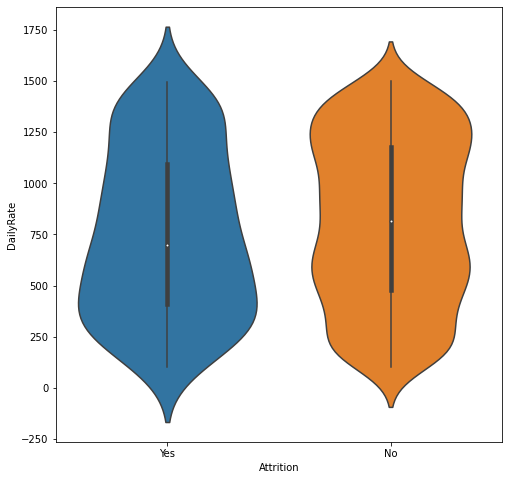

In [51]:
plt.figure(figsize=(8,8))
sns.violinplot(x='Attrition',y='DailyRate',data=df)

Employees show more attrition at lower daily rate and attrition keeps on decreasing as the daily rate increases and people become economically stable.

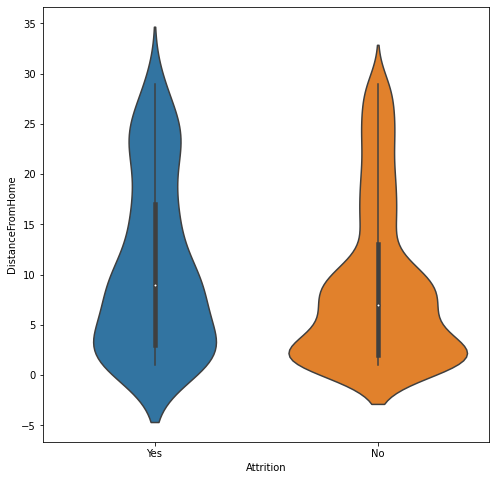

In [52]:
plt.figure(figsize=(8,8))
sns.violinplot(x='Attrition',y='DistanceFromHome',data=df)

As the distance increases attrition decreases in employees showing that employees attrit even if they are at ease.

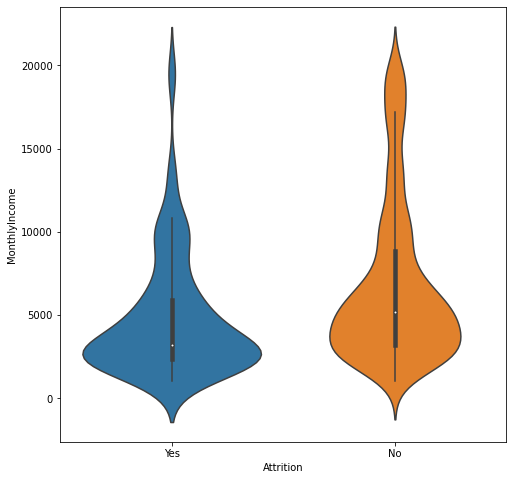

In [53]:
plt.figure(figsize=(8,8))
sns.violinplot(x='Attrition',y='MonthlyIncome',data=df)

Attrition is very high at low monthly income especially below 5000. As income inreases chances of employee leaving becomes very low,

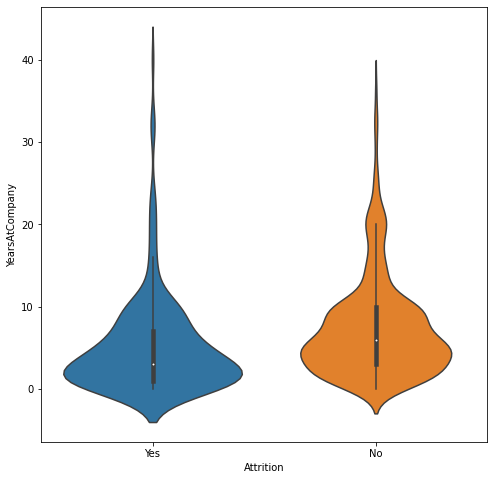

In [54]:
plt.figure(figsize=(8,8))
sns.violinplot(x='Attrition',y='YearsAtCompany',data=df)

There is high attrition when a employee is new to the company, new employees tend to change jobs for better pay and better career choices. Attrition is especially high below 5 years. As an eployee works for more than 15 years in a company, chances of him leaving the companny become very steep.

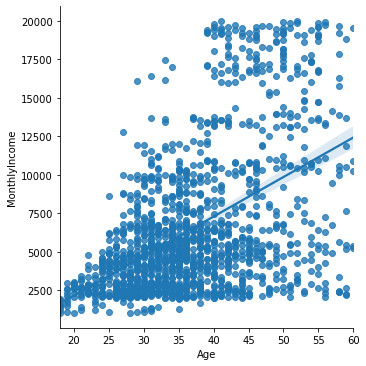

In [55]:
sns.lmplot(x='Age',y='MonthlyIncome',data=df)

As Age increases monthly income also increases. Some people work hard and tend to achieve higher incomes at less age also.

### Multivariate Analysis

<Figure size 576x576 with 0 Axes>

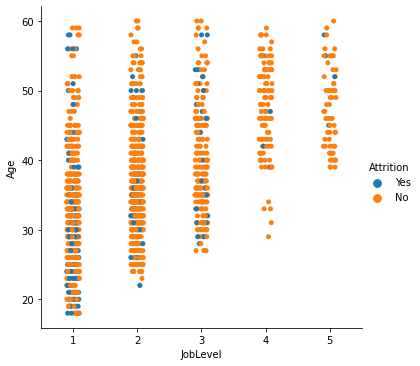

In [56]:
plt.figure(figsize=(8,8))
sns.catplot(x='JobLevel',y='Age',hue='Attrition',data=df)

As the age increases so does the job level and attrition decreases. Maximum attrition is seen in job level 1 and 3 irrespective of age of the employee/

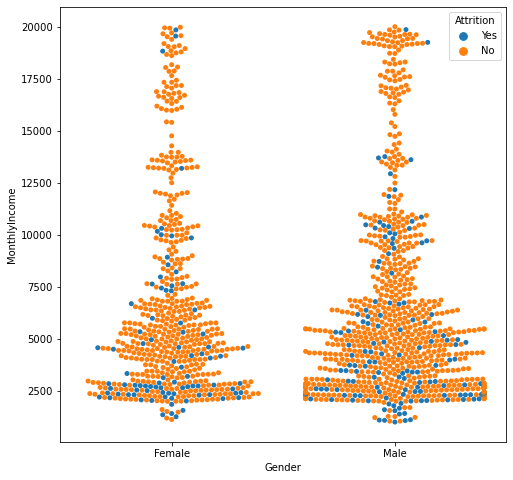

In [57]:
plt.figure(figsize=(8,8))
sns.swarmplot(x='Gender',y='MonthlyIncome',hue='Attrition',data=df)

There is satisfaction in females even at lower incomes as their attrition decreases after 10000 significantly but males seem to change jobs even after that.

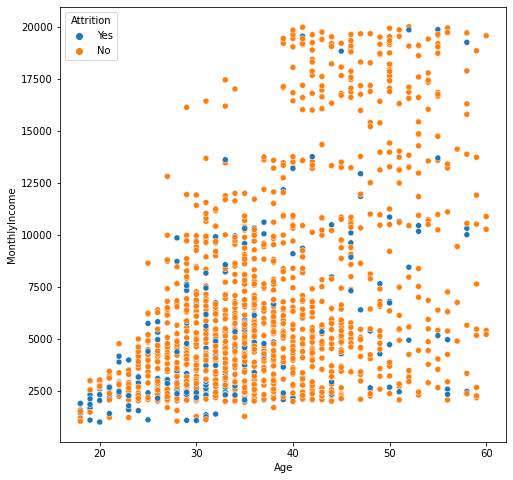

In [58]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='Age',y='MonthlyIncome',hue='Attrition',data=df)

As age increases,monthly income increases and employees have low chances of leaving the company but if monthly income is lower at higher ages then chances of employee leaving the company increases.

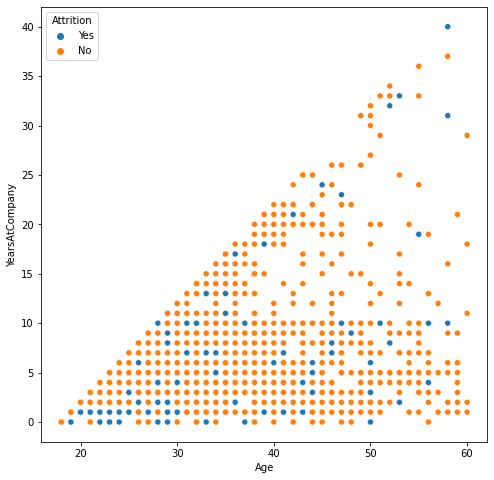

In [59]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='Age',y='YearsAtCompany',hue='Attrition',data=df)

As we can see as the age and years at company increases density of grapgh decreases stating that as age increases very few people remain at the same company. Also high attrition is also seen at higher ages if years at company is less.

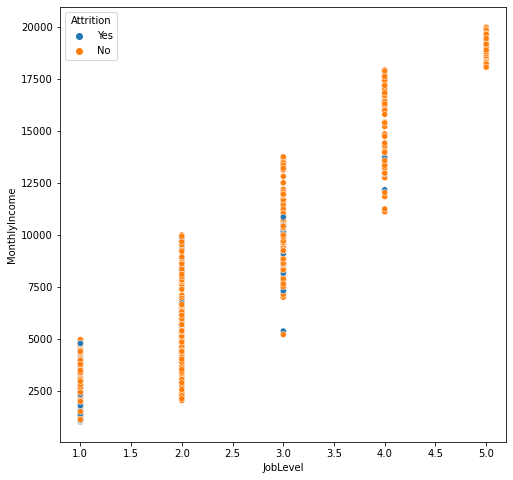

In [60]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='JobLevel',y='MonthlyIncome',hue='Attrition',data=df)

Income increases with increase in job level and attrition decreases at high job levels.

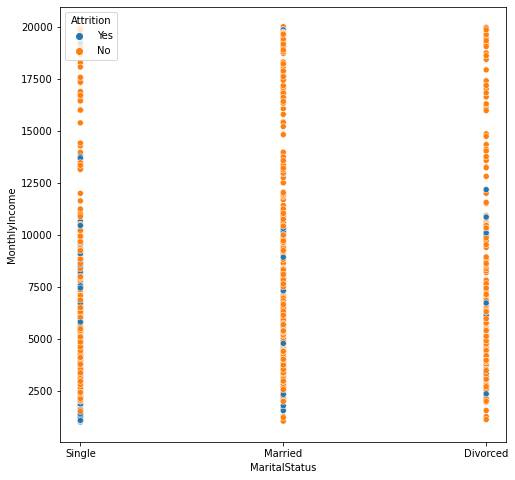

In [61]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='MaritalStatus',y='MonthlyIncome',hue='Attrition',data=df)

Single employees at higher income also tend to attrit while married employees do not do so. This is also with the case of Divorced employees after income of 12500 there is no attrition.

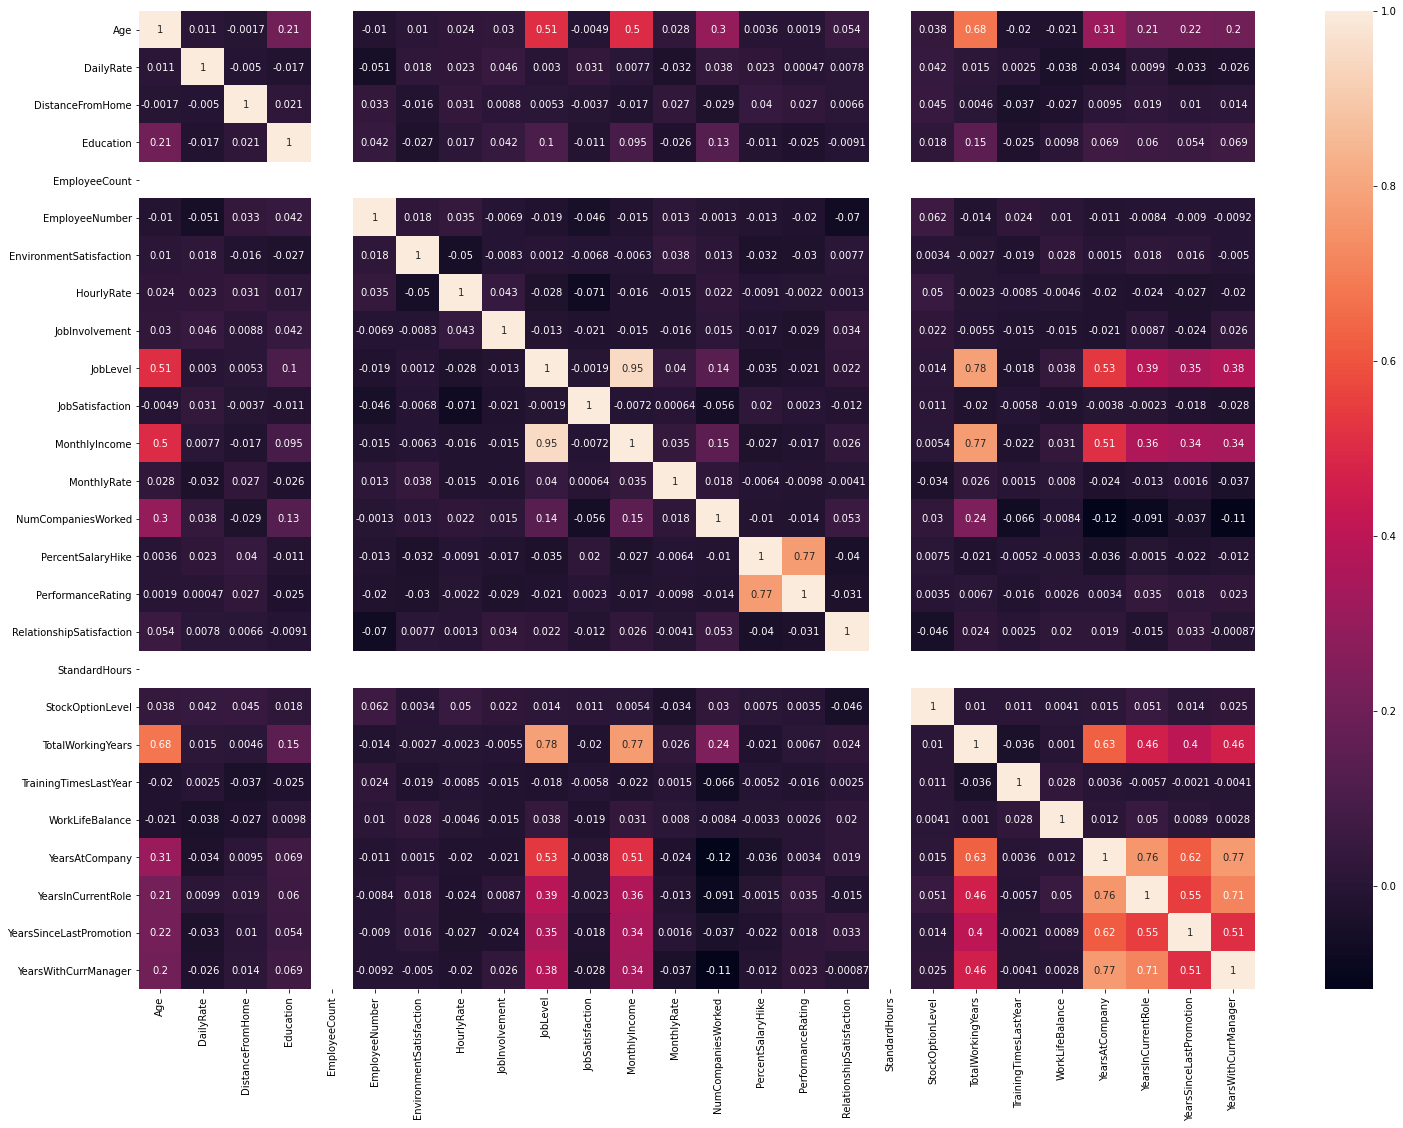

In [62]:
plt.figure(figsize=(25,18))
sns.heatmap(df.corr(),annot=True)

We cannot see correlation of attrition column as it is of object type, we need to encode it first to see its correlation with defferent features. We can also see that there is high correlation between independent features such as (performace rating and percentage salary hike), (total working years and job level) etc, this situation can lead to multicollinearity which we need to take care of.

# Feature Engineering

###### Dropping columns constant and identifier columns.

In [63]:
df.drop(['EmployeeNumber','StandardHours','Over18','EmployeeCount'],axis=1,inplace=True)

###### Encoding the categorical type data

In [64]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
o=OrdinalEncoder()
l=LabelEncoder()

In [65]:
#Encoding independent features with ordinal encoder
for i in df.columns:
    if df[i].dtypes=='O' and i!='Attrition':
        df[i]=o.fit_transform(df[i].values.reshape(-1,1))

#Encoding label column with label encoder
df['Attrition']=l.fit_transform(df['Attrition'])

###### Removing Outliers

In [66]:
#Function to choose the right threshold 
def outliersz(z):
    for i in np.arange(3,5,0.2):
        data=df.copy()
        data=data[(z<i).all(axis=1)]
        loss=(df.shape[0]-data.shape[0])/df.shape[0]*100
        print('With threshold {} data loss is {}%'.format(np.round(i,1),np.round(loss,2)))
        

In [67]:
#Using zscore method to remove outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
outliersz(z)

With threshold 3.0 data loss is 5.65%
With threshold 3.2 data loss is 4.22%
With threshold 3.4 data loss is 3.13%
With threshold 3.6 data loss is 2.72%
With threshold 3.8 data loss is 1.77%
With threshold 4.0 data loss is 0.88%
With threshold 4.2 data loss is 0.68%
With threshold 4.4 data loss is 0.34%
With threshold 4.6 data loss is 0.27%
With threshold 4.8 data loss is 0.14%


We choose threhold as 3.4 so that data loss is less than 4% and also there are some outliers we are important for our classification process.

In [68]:
df=df[(z<3.4).all(axis=1)]

###### Removing Skewness from Data

In [69]:
#We us square root method to remove method for all the continuous variables except for monthly income as it is incapable of it.
for i in cont:
    if np.abs(df[i].skew())>0.5 and i!='MonthlyIncome':
        df[i]=np.sqrt(df[i])

In [70]:
#Using log method to remove skewness from Monthly income
df['MonthlyIncome']=np.log(df['MonthlyIncome']) 

In [71]:
for i in cont:
    print(df[i].skew())

0.45161719780360593
-0.0099792467518277
0.3955605785857213
-0.03151658235828881
0.30662120616070093
0.024508336284755135
0.1119968888661742
0.15508819581753688


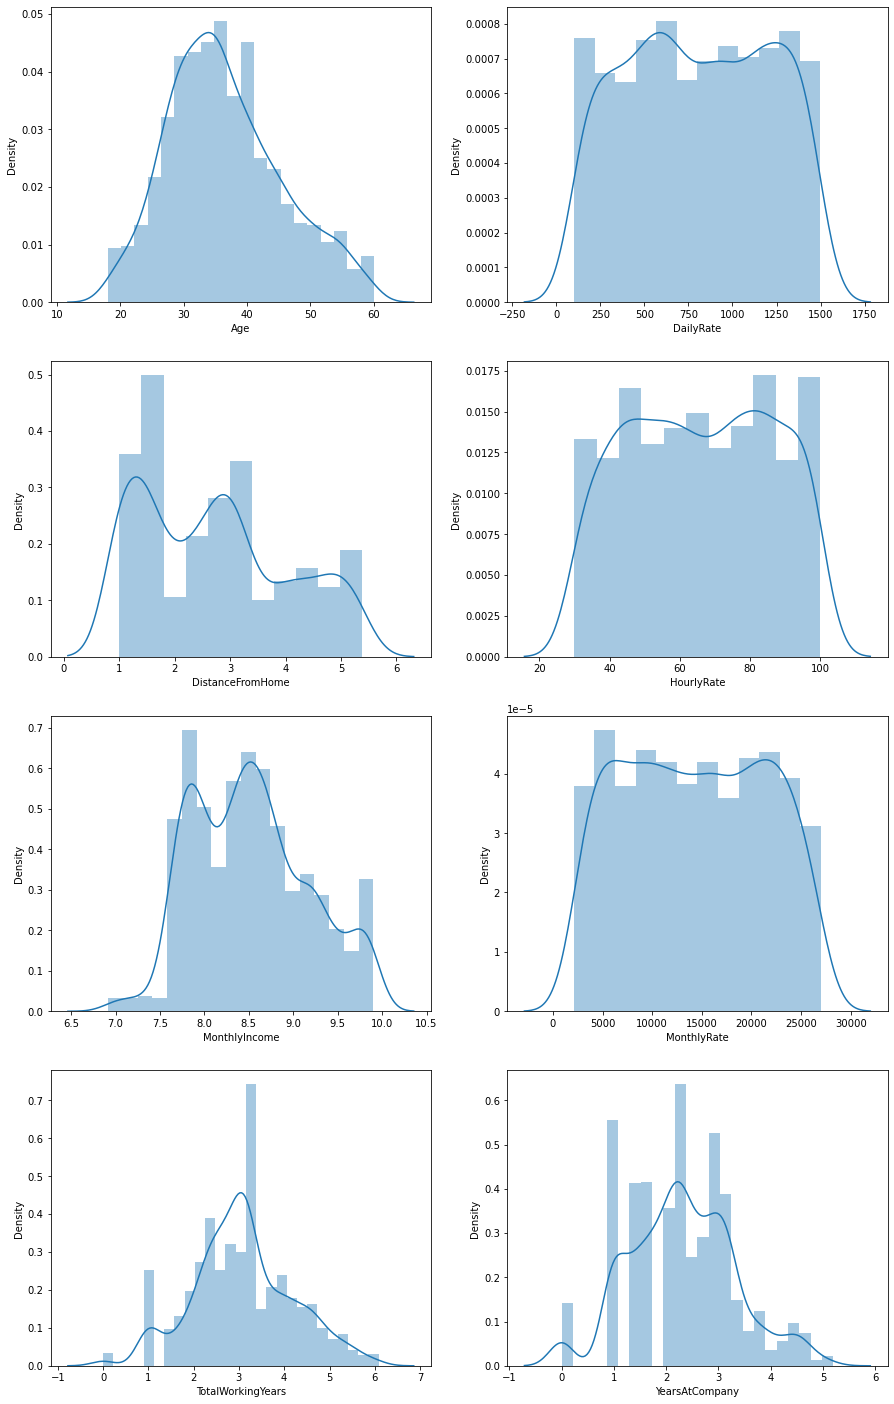

In [72]:
fig,ax=plt.subplots(4,2,figsize=(15,25))
r=0
c=0
for i,n in enumerate(cont):
    if i%2==0 and i>0:
        r+=1
        c=0
    sns.distplot(df[n],ax=ax[r,c])
    c+=1

As we can see Skewness is removed and is negligible in the continuous data.

###### Separating the dependent and independent variables

In [73]:
x=df.copy()
x.drop('Attrition',axis=1,inplace=True)
y=df['Attrition']

###### Handling Imbalancing of Data

In [74]:
#Over Sampling the data using SMOTE
from imblearn.over_sampling import SMOTE
over=SMOTE()

In [75]:
x,y=over.fit_resample(x,y)

1    1194
0    1194
Name: Attrition, dtype: int64

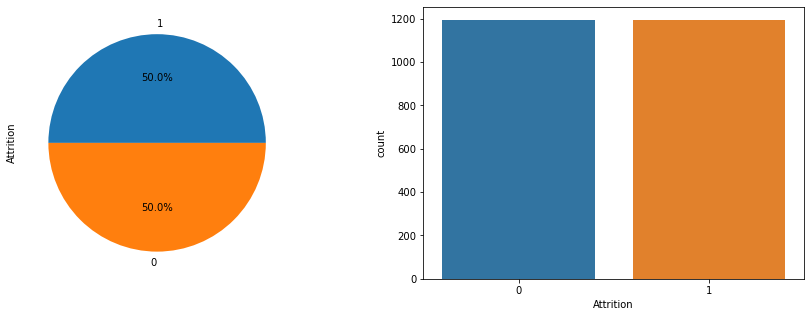

In [76]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
y.value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(y)
y.value_counts()

Now both the classes in the label class is equal and data is balanced.

###### Scaling the data

In [77]:
#Scaling the data using min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [78]:
xd=scaler.fit_transform(x)
x=pd.DataFrame(xd,columns=x.columns)

# Modelling Phase

###### Importing necessary libraries

In [79]:
#We import Classification Models
from sklearn.naive_bayes import  GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [80]:
from sklearn.model_selection import train_test_split, cross_val_score

In [81]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [82]:
#Function to find the best random state
def randomstate(x,y):
    maxx=0
    model=LogisticRegression()
    for i in range(1,201):
        xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=i)
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        accu=accuracy_score(p,ytest)
        if accu>maxx:
            maxx=accu
            j=i
    return j

In [83]:
#Splitting data into train and test
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=randomstate(x,y))

In [84]:
#To evakuate performances of all the models
def performance(p,ytest,m,xtest,s):
    print('------------------------------------',m,'------------------------------------')
    print('Accuracy',np.round(accuracy_score(p,ytest),4))
    print('----------------------------------------------------------')
    print('Mean of Cross Validation Score',np.round(s.mean(),4))
    print('----------------------------------------------------------')
    print('AUC_ROC Score',np.round(roc_auc_score(ytest,m.predict_proba(xtest)[:,1]),4))
    print('----------------------------------------------------------')
    print('Confusion Matrix')
    print(confusion_matrix(p,ytest))
    print('----------------------------------------------------------')
    print('Classification Report')
    print(classification_report(p,ytest))

In [85]:
#Creating a list of models which will be created one by one
models=[GaussianNB(),KNeighborsClassifier(),SVC(probability=True),LogisticRegression(),DecisionTreeClassifier(),
        RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),XGBClassifier(verbosity=0)]

In [86]:
#Creates and trains model from the models list
def createmodel(trainx,testx,trainy,testy):
    for i in models:
        model=i
        model.fit(trainx,trainy)
        p=model.predict(testx)
        score=cross_val_score(model,x,y,cv=10)
        performance(p,testy,model,testx,score) 

In [87]:
createmodel(xtrain,xtest,ytrain,ytest)

------------------------------------ GaussianNB() ------------------------------------
Accuracy 0.8074
----------------------------------------------------------
Mean of Cross Validation Score 0.763
----------------------------------------------------------
AUC_ROC Score 0.9026
----------------------------------------------------------
Confusion Matrix
[[238  49]
 [ 66 244]]
----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.78      0.83      0.81       287
           1       0.83      0.79      0.81       310

    accuracy                           0.81       597
   macro avg       0.81      0.81      0.81       597
weighted avg       0.81      0.81      0.81       597

------------------------------------ KNeighborsClassifier() ------------------------------------
Accuracy 0.8677
----------------------------------------------------------
Mean of Cross Validation Score 0.8605
----

Support Vector Classifier along with ensemble techiques like Random Forest, Gradient Boost and Xtreme Gradient Boost are doing a good job. So lets perform Hyperparameter tuning on these models to see which model is performing the best.

# Hyperparameter tuning

In [88]:
from sklearn.model_selection import GridSearchCV

###### Random Forest

In [89]:
params={'n_estimators':[100, 200, 300, 400, 500],
            'criterion':['gini','entropty'],
            'max_depth':[None,1,2,3,4,5,6,7,8,9,10],
           'max_features':['int','float','auto','log2']}

In [90]:
g=GridSearchCV(RandomForestClassifier(),params,cv=10)

In [91]:
g.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropty'],
                         'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['int', 'float', 'auto', 'log2'],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [92]:
print(g.best_params_)
print(g.best_estimator_)
print(g.best_score_)

{'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'n_estimators': 400}
RandomForestClassifier(max_features='log2', n_estimators=400)
0.9290844196151458


In [93]:
m=RandomForestClassifier(max_features='log2', n_estimators=400)
m.fit(xtrain,ytrain)
p=m.predict(xtest)
score=cross_val_score(m,x,y,cv=10)
performance(p,ytest,m,xtest,score)

------------------------------------ RandomForestClassifier(max_features='log2', n_estimators=400) ------------------------------------
Accuracy 0.933
----------------------------------------------------------
Mean of Cross Validation Score 0.9289
----------------------------------------------------------
AUC_ROC Score 0.979
----------------------------------------------------------
Confusion Matrix
[[300  36]
 [  4 257]]
----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.89      0.94       336
           1       0.88      0.98      0.93       261

    accuracy                           0.93       597
   macro avg       0.93      0.94      0.93       597
weighted avg       0.94      0.93      0.93       597



###### Gradient Boost

In [94]:
params={'n_estimators':[100,200,300,400,500],
      'learning_rate':[0.001,0.01,0.10,],
      'subsample':[0.5,1],
      'max_depth':[1,2,3,4,5,6,7,8,9,10]}

In [95]:
g=GridSearchCV(GradientBoostingClassifier(),params,cv=10)

In [96]:
g.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 200, 300, 400, 500],
                         'subsample': [0.5, 1]})

In [97]:
print(g.best_params_)
print(g.best_estimator_)
print(g.best_score_)

{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 300, 'subsample': 0.5}
GradientBoostingClassifier(max_depth=8, n_estimators=300, subsample=0.5)
0.9396989447548105


In [102]:
m=GradientBoostingClassifier(max_depth=8, n_estimators=300, subsample=0.5)
m.fit(xtrain,ytrain)
p=m.predict(xtest)
score=cross_val_score(m,x,y,cv=10)
performance(p,ytest,m,xtest,score)

------------------------------------ GradientBoostingClassifier(max_depth=8, n_estimators=300, subsample=0.5) ------------------------------------
Accuracy 0.933
----------------------------------------------------------
Mean of Cross Validation Score 0.9259
----------------------------------------------------------
AUC_ROC Score 0.9798
----------------------------------------------------------
Confusion Matrix
[[300  36]
 [  4 257]]
----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.89      0.94       336
           1       0.88      0.98      0.93       261

    accuracy                           0.93       597
   macro avg       0.93      0.94      0.93       597
weighted avg       0.94      0.93      0.93       597



###### Xtreme Gradient Boost

In [103]:
from sklearn.model_selection import RandomizedSearchCV

In [104]:
params={
 "learning_rate"    : [0.01,0.05, 0.10, 0.15, ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [105]:
g=RandomizedSearchCV(XGBClassifier(),params,cv=10)

In [106]:
g.fit(xtrain,ytrain)

RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100...
                                           num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
                                    

In [107]:
print(g.best_params_)
print(g.best_estimator_)
print(g.best_score_)

{'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.4, 'colsample_bytree': 0.3}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
0.9296337678460584


In [108]:
m=XGBClassifier(colsample_bytree=0.3, gamma= 0.4, learning_rate= 0.1, max_depth= 5, min_child_weight= 5)
m.fit(xtrain,ytrain)
p=m.predict(xtest)
score=cross_val_score(m,x,y,cv=10)
performance(p,ytest,m,xtest,score)

------------------------------------ XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) ------------------------------------
Accuracy 0.928
----------------------------------------------------------
Mean of Cross Validation Score 0.9213
----------------------------------------------------------
AUC_ROC Score 0.9762
----------------------------------------------------------
Confusion Matrix
[[298  37]
 [  6 256]]
---------------------------------------------------------

###### SVC

In [109]:
params={'C':[1,10,20],'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'degree':[1,2,3,4]}

In [110]:
g=RandomizedSearchCV(SVC(probability=True),params,cv=10)

In [111]:
g.fit(xtrain,ytrain)

RandomizedSearchCV(cv=10, estimator=SVC(probability=True),
                   param_distributions={'C': [1, 10, 20],
                                        'degree': [1, 2, 3, 4],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']})

In [112]:
print(g.best_params_)
print(g.best_estimator_)
print(g.best_score_)

{'kernel': 'rbf', 'degree': 3, 'C': 20}
SVC(C=20, probability=True)
0.9190409683426444


In [113]:
m=SVC(C=20,degree=3,kernel='rbf',probability=True)
m.fit(xtrain,ytrain)
p=m.predict(xtest)
score=cross_val_score(m,x,y,cv=10)
performance(p,ytest,m,xtest,score)

------------------------------------ SVC(C=20, probability=True) ------------------------------------
Accuracy 0.9313
----------------------------------------------------------
Mean of Cross Validation Score 0.9175
----------------------------------------------------------
AUC_ROC Score 0.9849
----------------------------------------------------------
Confusion Matrix
[[286  23]
 [ 18 270]]
----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       309
           1       0.92      0.94      0.93       288

    accuracy                           0.93       597
   macro avg       0.93      0.93      0.93       597
weighted avg       0.93      0.93      0.93       597



The best model for this problem is Extreme Gradient Boost as it gives a good performance also the difference between its accuracy score and mean cross validation score is minimum, which means it will not give high variances in its result.

# Finalizing the model

In [114]:
model=XGBClassifier(colsample_bytree=0.3, gamma= 0.4, learning_rate= 0.1, max_depth= 5, min_child_weight= 5)
model.fit(xtrain,ytrain)
p=model.predict(xtest)
score=cross_val_score(model,x,y,cv=10)

# Evaluation Metrics

In [115]:
performance(p,ytest,model,xtest,score)

------------------------------------ XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) ------------------------------------
Accuracy 0.928
----------------------------------------------------------
Mean of Cross Validation Score 0.9213
----------------------------------------------------------
AUC_ROC Score 0.9762
----------------------------------------------------------
Confusion Matrix
[[298  37]
 [  6 256]]
---------------------------------------------------------

In [116]:
fpred=pd.Series(model.predict_proba(xtest)[:,1])
fpr,tpr,threshold=roc_curve(ytest,fpred)

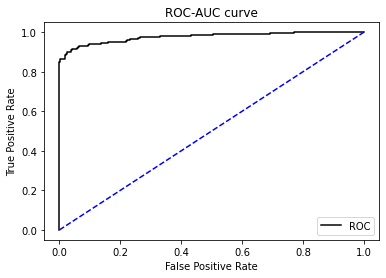

In [117]:
plt.plot(fpr,tpr,color='k',label='ROC')
plt.plot([0,1],[0,1],color='b',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC curve')
plt.legend()

# Saving the model

In [118]:
import joblib
joblib.dump(model,'Hr_attrition.obj')

['Hr_attrition.obj']